## Fuel Quality Dataset

### Introduction
Electric Utilities report a huge amount of information to government and public agencies. They include very granular data on fuel burned, electricity generated, power plant usage patterns, plant capacity factors and emissions from greenhouse gases. However, this data is not well documented and sometimes they are provided in a format that makes it difficult to understand. The dataset can be <a href = https://bit.ly/HDSC-StageOneDataset>found here.</a>   

### Problem Statement
The goal of this project is to clean, wrangle, explore, provide summary statistics and interesting visualization on the dataset given.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
%matplotlib inline
import seaborn as sns

In [2]:
#Read the dataset into dataframe
fuel_qual = pd.read_csv('fuel_ferc1.csv')

In [3]:
fuel_qual.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533,1.000,2.77,2.77,2.570


In [4]:
print('All features of the fuel quality dataset:\n\n ',fuel_qual.columns)

All features of the fuel quality dataset:

  Index(['record_id', 'utility_id_ferc1', 'report_year', 'plant_name_ferc1',
       'fuel_type_code_pudl', 'fuel_unit', 'fuel_qty_burned',
       'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned',
       'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu'],
      dtype='object')


In [5]:
print('Data dimension: ', fuel_qual.shape)

Data dimension:  (29523, 11)


In [6]:
print('Are there any duplicated rows? ',fuel_qual.duplicated().any())

Are there any duplicated rows?  False


In [7]:
#Summary statistics of the numerical features
fuel_qual.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


Reading the above summary statistics above, it can be clearly seen that all the features includes outliers (wide margin outliers) except the *report_year*. Having that in mind, I selected all the columns from my dataframe, dropped the report_year and visualized them using a boxplot.

In [8]:
outlier_features = fuel_qual.select_dtypes(include=[np.number]).drop('report_year', axis = 1)
outlier_features.head()

,utility_id_ferc1,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,1,5377489,16.590,18.59,18.53,1.121
1,1,10486945,16.592,18.58,18.53,1.120
2,2,2978683,24.130,39.72,38.12,1.650
3,2,3739484,23.950,47.21,45.99,1.970
4,2,40533,1.000,2.77,2.77,2.570


In [9]:
outlier_features.columns

Index(['utility_id_ferc1', 'fuel_qty_burned', 'fuel_mmbtu_per_unit',
       'fuel_cost_per_unit_burned', 'fuel_cost_per_unit_delivered',
       'fuel_cost_per_mmbtu'],
      dtype='object')

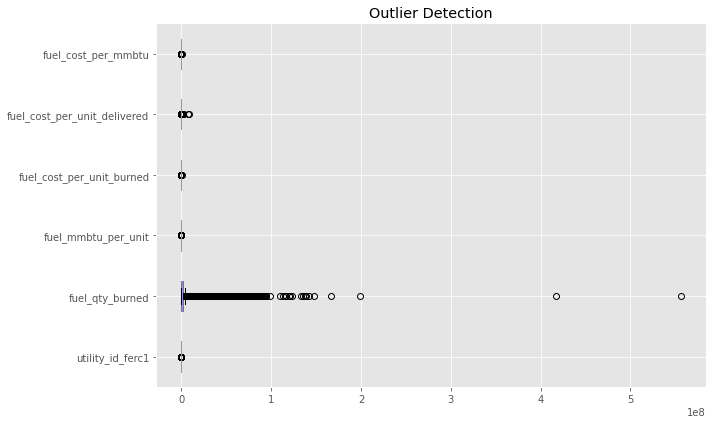

In [10]:
outlier_features.plot(kind = 'box',
                      vert = False,
              figsize = (10, 6))
plt.title('Outlier Detection')
plt.tight_layout()

In [11]:
#Summary statistics of the categorical features
fuel_qual.describe(include = 'object')

,record_id,plant_name_ferc1,fuel_type_code_pudl,fuel_unit
count,29523,29523,29523,29343
unique,29523,2315,6,9
top,f1_fuel_2007_12_157_0_11,big stone,gas,mcf
freq,1,156,11486,11354


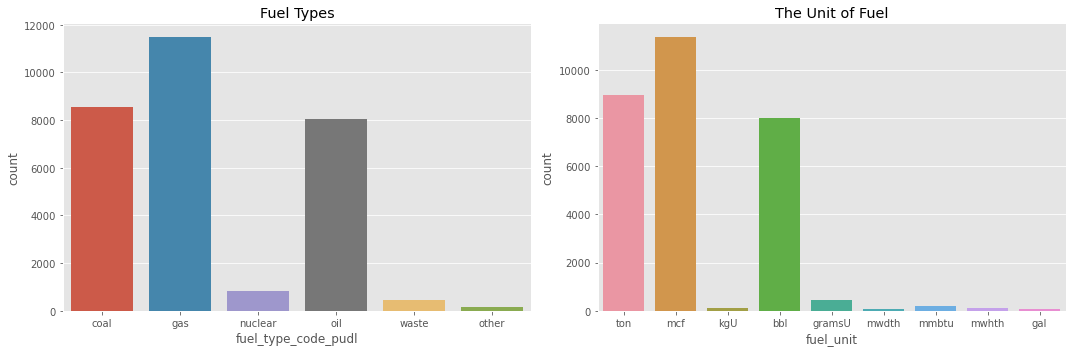

In [12]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.countplot(fuel_qual['fuel_type_code_pudl'], ax = ax[0])
sns.countplot(fuel_qual['fuel_unit'], ax = ax[1])
ax[0].title.set_text('Fuel Types')
ax[1].title.set_text('The Unit of Fuel')
plt.tight_layout()

Text(0.5, 1.0, 'Distribution of The Plant Names')

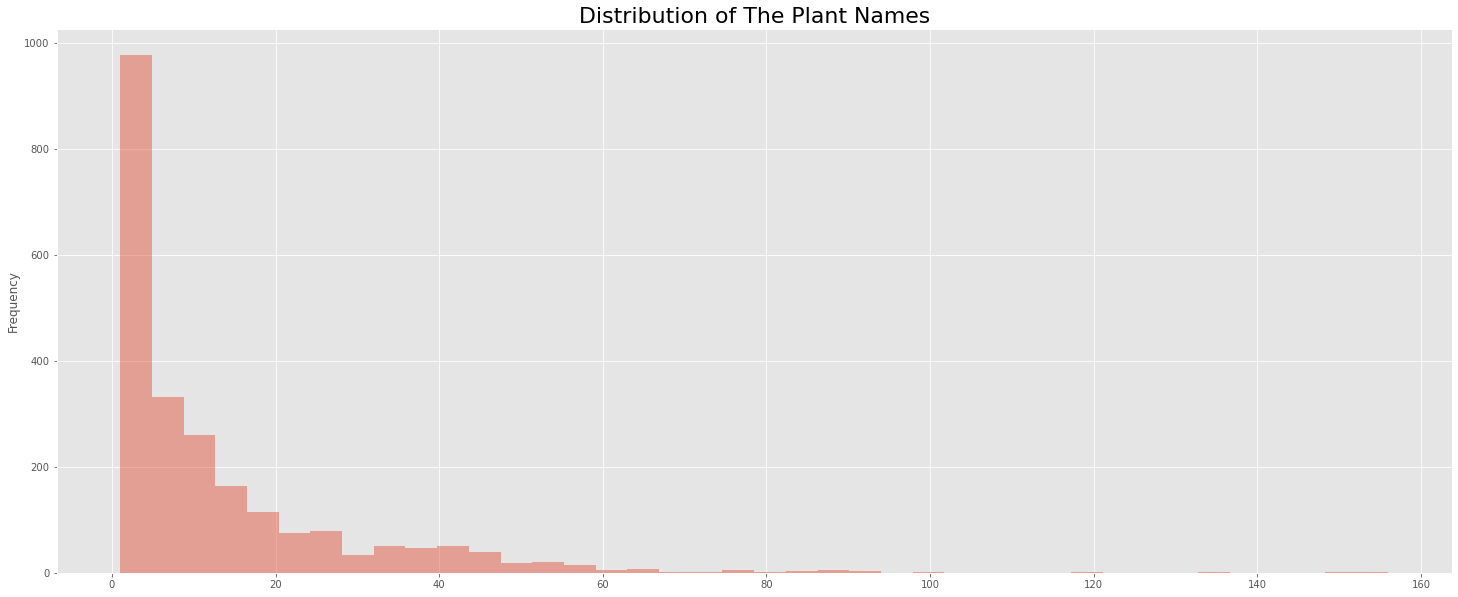

In [13]:
fuel_qual.plant_name_ferc1.value_counts().plot(kind = 'hist',
                                              figsize = (25,10),
                                              bins = 40,
                                              alpha = 0.45)
plt.title('Distribution of The Plant Names', fontsize = 22)

In [14]:
#To check the skewness of the fuel quantity burned
stats.skew(fuel_qual.fuel_qty_burned)

15.850690077422112

In [15]:
#To check the kurtosis of the fuel quantity burned
stats.kurtosis(fuel_qual.fuel_qty_burned)

651.2589365474387

### Missing Values

In [16]:
#Checking data information and data types
fuel_qual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29343 non-null  object 
 6   fuel_qty_burned               29523 non-null  int64  
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 2.5+ MB


In [17]:
#To check the sum of the missing values
fuel_qual.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [18]:
#To check the percentage of the missing values and sort them
missing_value = (fuel_qual.isnull().sum()) / len(fuel_qual) * 100
missing_value.sort_values(ascending= False)

fuel_unit                       0.609694
fuel_cost_per_mmbtu             0.000000
fuel_cost_per_unit_delivered    0.000000
fuel_cost_per_unit_burned       0.000000
fuel_mmbtu_per_unit             0.000000
fuel_qty_burned                 0.000000
fuel_type_code_pudl             0.000000
plant_name_ferc1                0.000000
report_year                     0.000000
utility_id_ferc1                0.000000
record_id                       0.000000
dtype: float64

In [19]:
#Since the missing data is a categorical data, mode is the best to fill the dataset
stats.mode(fuel_qual.fuel_unit)

ModeResult(mode=array(['mcf'], dtype=object), count=array([11354]))

In [20]:
fuel_qual.fuel_unit.fillna('mcf', inplace=True)

In [21]:
fuel_qual.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

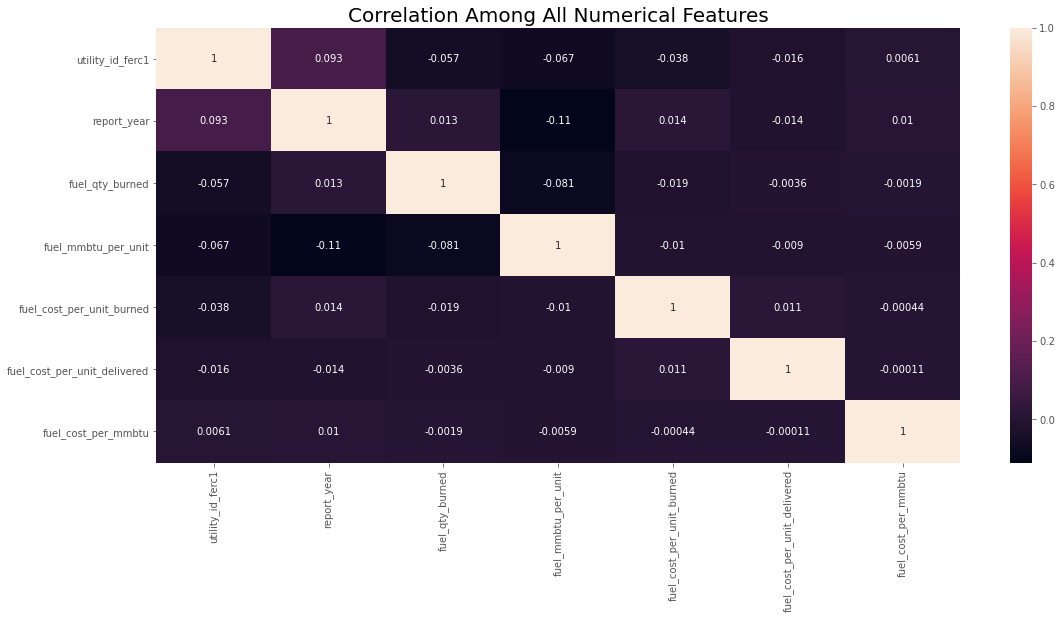

In [22]:
#Features correlation
f, ax = plt.subplots(figsize = (18,8))
plt.title('Correlation Among All Numerical Features', fontsize = 20)
sns.heatmap(fuel_qual.corr(), annot = True)

In [23]:
#features correlation with respect to fuel cost per unit burned
fuel_qual_corr = fuel_qual.corr()
fuel_qual_corr = fuel_qual_corr.fuel_cost_per_unit_burned.sort_values(ascending = False)
fuel_qual_corr

fuel_cost_per_unit_burned       1.000000
report_year                     0.013599
fuel_cost_per_unit_delivered    0.011007
fuel_cost_per_mmbtu            -0.000437
fuel_mmbtu_per_unit            -0.010034
fuel_qty_burned                -0.018535
utility_id_ferc1               -0.037863
Name: fuel_cost_per_unit_burned, dtype: float64

In [24]:
#creating more features
fuel_qual['total_cost_fuel_burned'] = fuel_qual.fuel_qty_burned * fuel_qual.fuel_cost_per_unit_burned
fuel_qual['total_cost_mmbtu_fuel'] = fuel_qual.fuel_mmbtu_per_unit * fuel_qual.fuel_cost_per_mmbtu
fuel_qual['percent_fuel_cost_per_unit_burned'] = fuel_qual.fuel_cost_per_unit_burned.value_counts(normalize=True) * 100

In [25]:
fuel_qual.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu,total_cost_fuel_burned,total_cost_mmbtu_fuel,percent_fuel_cost_per_unit_burned
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489,16.590,18.59,18.53,1.121,9.996752e+07,18.59739,0.975511
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945,16.592,18.58,18.53,1.120,1.948474e+08,18.58304,0.003387
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683,24.130,39.72,38.12,1.650,1.183133e+08,39.81450,0.013549
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484,23.950,47.21,45.99,1.970,1.765410e+08,47.18150,0.033872
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533,1.000,2.77,2.77,2.570,1.122764e+05,2.57000,0.033872


In [26]:
groupby_year = fuel_qual.groupby('report_year').sum().round(decimals = 2)
groupby_year

,utility_id_ferc1,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu,total_cost_fuel_burned,total_cost_mmbtu_fuel,percent_fuel_cost_per_unit_burned
report_year,,,,,,,,,
1994,131059,3364162841,13138.05,263292.12,78590.53,3812.42,5.327818e+10,23787.96,1.45
1995,132277,4458192116,12784.44,425661.49,39315.06,3445.47,6.613160e+10,21007.28,0.00
1996,118281,2768692878,11726.51,86425.28,10006016.07,2933.12,2.588083e+10,20605.82,0.00
1997,118553,3077972763,11210.91,163533.45,12187375.78,3406.15,1.203283e+11,19764.35,0.01
1998,121599,3617070075,11850.39,140238.66,317879.94,3072.88,5.542562e+10,17321.63,0.00
1999,113634,3445344906,11086.83,126056.28,26829.21,2877.26,1.545287e+11,15824.33,0.00
2000,152518,3394100198,12665.20,326495.43,1352903.23,5778.14,3.450366e+11,28798.14,0.00
2001,153935,3147821459,11351.71,180365.64,81428.34,6254.76,1.598751e+11,30821.73,0.00
2002,145027,2585502144,10007.32,121921.13,57351.21,7502.67,2.797661e+10,25516.60,0.00


Text(0.5, 1.0, 'Fuel Cost Per Unit Burned Over Years With Respect to Fuel Types')

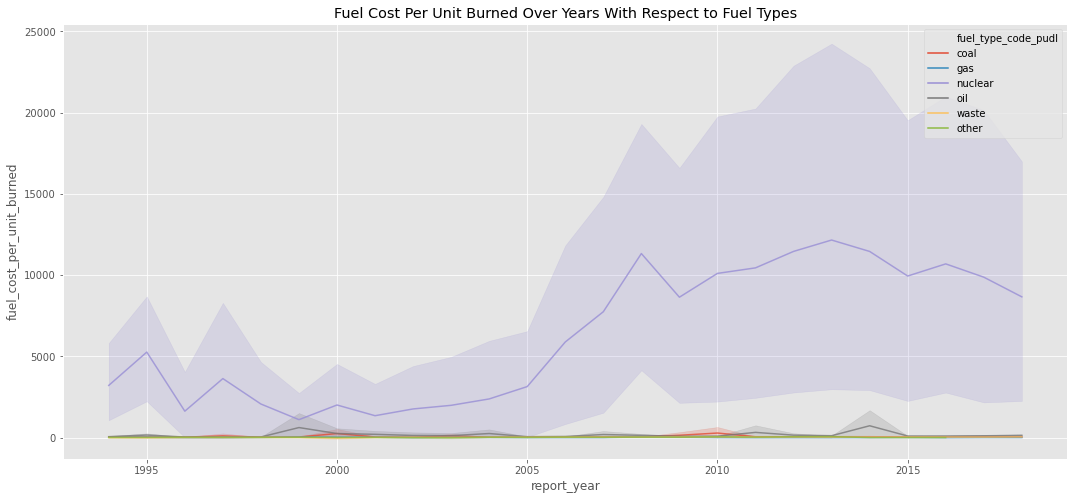

In [27]:
f, ax = plt.subplots(figsize = (18,8))
sns.lineplot(x = 'report_year', y = 'fuel_cost_per_unit_burned', hue = 'fuel_type_code_pudl',  data = fuel_qual, alpha = 0.8)
plt.title('Fuel Cost Per Unit Burned Over Years With Respect to Fuel Types')